In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def populate():
    pop = [np.random.randint(0, 2, 20).tolist() for _ in range(10)]
    return pop

In [3]:
def mutate(pop):
    for i in range(len(pop)):
        row = pop[i]
        index = np.random.randint(0, 20)
        bit = row[index]
        
        if bit == 0:
            row[index] = 1
        elif bit ==1:
            row[index] = 0
               
        pop[i] = row   
        
    return pop    



In [4]:
def onepoint(pop):
    
    sortedpop = selection(pop)
    i = 0
    while i < len(pop):
        index = np.random.randint(0, 20)#split point
        parent1 = pop[sortedpop[i][1]]
        parent2 = pop[sortedpop[i+1][1]]
        
        child1 = parent1[:index]+parent2[index:]
        child2 = parent2[:index]+parent1[index:]
        
        if(fitness(child1)>fitness(parent1)):
            pop[sortedpop[i][1]] = child1
        if(fitness(child2)>fitness(parent2)):
            pop[sortedpop[i+1][1]] = child2
        
        i = i+2
        
    return pop 

In [5]:
def selection(pop):
    arr = [[0 for x in range(2)] for y in range(10)] 
    for i in range(len(pop)):
        arr[i][0] = fitness(pop[i])
        arr[i][1] = i #store index
        
        
    arr.sort(reverse = True)
    return arr

In [6]:
def fitness(row):
    counter = 0
    zerocount = 0
    
    for j in range(len(row)): 
        if row[j] == 1:
            counter = counter +1
        else:
            zerocount = zerocount+1
            
            
    if zerocount == 20:
        return zerocount*2
                
    return counter
    

In [7]:
def avgfitness(pop):
    avg = 0
    for j in range(len(pop)):
        avg = avg + fitness(pop[j])
        
    avg = avg/len(pop)   
    return avg

In [8]:
def best(pop):
    best =0
     
    for i in range(len(pop)):
        fitn = fitness(pop[i])
        if fitn>best:
            best = fitn
            
    return best 

In [10]:
average =[]
pop = populate()

for i in range(1000):
      
    pop = onepoint(pop)
    pop = mutate(pop)
    average.append(avgfitness(pop))
    
    #check for max 
    beststring = best(pop)
    if beststring == 40:
        print('target found')
        break
      

Text(0.5, 1.0, 'Average fitness after 1000 generations')

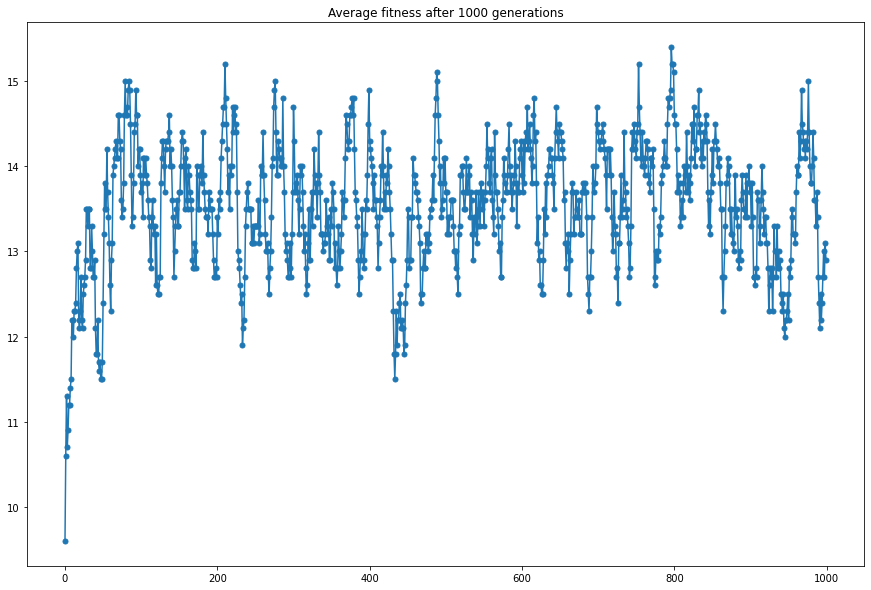

In [13]:
length = list(range(1000))
plt.figure(figsize=(15,10))
plt.plot(length,average,'o-',label="Fitness",ms = 5)
plt.title("Average fitness after 1000 generations")